全帯域を使った TDoA 方式の測位


In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from positioning.readwav import readwav
from positioning.sound_db import CeilingTDoADB
from positioning import tools

In [3]:
plt.style.use(["science", "notebook"])

In [5]:
df_true = pd.read_csv("../data/pos-reflect-1ms/measure-points.csv", index_col=0)

In [6]:
db = CeilingTDoADB("../data/reference-reflect-1ms")

In [7]:
test_signal = [readwav(f"../data/pos-reflect-1ms/p{i+28}.wav")[:, 1] for i in range(14)]

In [8]:
est = np.array(
    [
        [db.positioning(s[i * 120000 : (i + 2) * 120000]) for i in range(100)]
        for s in test_signal
    ]
)

In [9]:
print(est)

[[[ -0.2832552    1.13607455   1.06931952 -14.          44.
    64.        ]
  [ -0.28884003   1.15847407   1.04702635 -14.          44.
    63.        ]
  [ -0.28884003   1.15847407   1.04702635 -14.          44.
    63.        ]
  ...
  [ -0.28884003   1.15847407   1.04702635 -14.          44.
    63.        ]
  [ -0.2832552    1.13607455   1.06931952 -14.          44.
    64.        ]
  [ -0.28884003   1.15847407   1.04702635 -14.          44.
    63.        ]]

 [[  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]
  [  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]
  [  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]
  ...
  [  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]
  [  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]
  [  0.28277971   1.22485347   1.06812715  13.          42.
    62.        ]]

 [[ -0.23042351   1.63954848   1.08324238  -8.          34.


In [10]:
r, theta, phi = tools.rect_to_polar_3d(df_true["x"], df_true["y"], df_true["z"] - 2.2)
df_true["distance"] = r
df_true["azimuth"] = theta
df_true["elevation"] = phi
v_distance, _, _ = tools.rect_to_polar_3d(
    df_true["x"], df_true["y"], df_true["z"] - 2.8
)
df_true["v_distance"] = v_distance
df_true["distance_diff"] = np.abs(df_true["distance"] - df_true["v_distance"])
df_true["sample_diff"] = (df_true["distance_diff"] / 340 * 48000).astype(int)
df_true

,x,y,z,distance,azimuth,elevation,v_distance,distance_diff,sample_diff
p28,-0.25,1.25,1.000,1.750714,-11.309932,43.830861,2.205675,0.454960,64
p29,0.25,1.25,1.000,1.750714,11.309932,43.830861,2.205675,0.454960,64
p30,-0.25,1.75,1.000,2.136586,-8.130102,34.438989,2.522895,0.386309,54
p31,0.25,1.75,1.000,2.136586,8.130102,34.438989,2.522895,0.386309,54
p32,-0.25,1.25,1.250,1.589811,-11.309932,37.234834,2.006863,0.417052,58
p33,0.25,1.25,1.250,1.589811,11.309932,37.234834,2.006863,0.417052,58
p34,-0.25,1.75,1.250,2.006863,-8.130102,28.495639,2.351064,0.344200,48
p35,0.25,1.75,1.250,2.006863,8.130102,28.495639,2.351064,0.344200,48
p36,-0.25,1.25,0.750,1.930673,-11.309932,49.236395,2.414022,0.483348,68
p37,0.25,1.25,0.750,1.930673,11.309932,49.236395,2.414022,0.483348,68


In [11]:
pos_error = np.array(
    [
        [
            np.linalg.norm(est[i, j, 0:3] - df_true.iloc[i][["x", "y", "z"]].values)
            for j in range(100)
        ]
        for i in range(14)
    ]
)

In [12]:
print(pos_error)

[[0.13744131 0.10998645 0.10998645 ... 0.10998645 0.13744131 0.10998645]
 [0.07967538 0.07967538 0.07967538 ... 0.07967538 0.07967538 0.07967538]
 [0.13968562 0.17741925 0.16382498 ... 0.17612973 0.14202687 0.17612973]
 ...
 [0.45768974 0.46049546 0.45660047 ... 0.46049546 0.4904146  0.45768974]
 [0.24276671 0.25413655 0.24276671 ... 0.24276671 0.24276671 0.25413655]
 [0.27851415 0.27851415 0.24663973 ... 0.27851415 0.27851415 0.24663973]]


In [13]:
azimuth_error = np.abs(est[:, :, 3] - df_true["azimuth"].to_numpy().reshape(-1, 1))
elevation_error = np.abs(est[:, :, 4] - df_true["elevation"].to_numpy().reshape(-1, 1))
tdoa_error = np.abs(est[:, :, 5] - df_true["sample_diff"].to_numpy().reshape(-1, 1))
print(azimuth_error)

[[2.69006753 2.69006753 2.69006753 ... 2.69006753 2.69006753 2.69006753]
 [1.69006753 1.69006753 1.69006753 ... 1.69006753 1.69006753 1.69006753]
 [0.13010235 1.13010235 2.86989765 ... 0.86989765 0.86989765 0.86989765]
 ...
 [1.13010235 2.13010235 0.13010235 ... 2.13010235 1.13010235 1.13010235]
 [6.         6.         6.         ... 6.         6.         6.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
df_est = pd.DataFrame()
for i, d in enumerate(est):
    df_est = pd.concat(
        [
            df_est,
            pd.DataFrame(
                d, columns=["x", "y", "z", "azimuth", "elevation", "tdoa"]
            ).assign(test=i),
        ]
    ).reset_index(drop=True)
df_est["position_error"] = pos_error.reshape(-1)
df_est["azimuth_error"] = azimuth_error.reshape(-1)
df_est["elevation_error"] = elevation_error.reshape(-1)
df_est["tdoa_error"] = tdoa_error.reshape(-1)
df_est.head()

,x,y,z,azimuth,elevation,tdoa,test,position_error,azimuth_error,elevation_error,tdoa_error
0,-0.283255,1.136075,1.069320,-14.0,44.0,64.0,0,0.137441,2.690068,0.169139,0.0
1,-0.288840,1.158474,1.047026,-14.0,44.0,63.0,0,0.109986,2.690068,0.169139,1.0
2,-0.288840,1.158474,1.047026,-14.0,44.0,63.0,0,0.109986,2.690068,0.169139,1.0
3,-0.263385,1.140845,1.069320,-13.0,44.0,64.0,0,0.129997,1.690068,0.169139,0.0
4,-0.288840,1.158474,1.047026,-14.0,44.0,63.0,0,0.109986,2.690068,0.169139,1.0


In [15]:
for idx, row in df_est.iterrows():
    print(idx)
    print(row["test"])

0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
20
0.0
21
0.0
22
0.0
23
0.0
24
0.0
25
0.0
26
0.0
27
0.0
28
0.0
29
0.0
30
0.0
31
0.0
32
0.0
33
0.0
34
0.0
35
0.0
36
0.0
37
0.0
38
0.0
39
0.0
40
0.0
41
0.0
42
0.0
43
0.0
44
0.0
45
0.0
46
0.0
47
0.0
48
0.0
49
0.0
50
0.0
51
0.0
52
0.0
53
0.0
54
0.0
55
0.0
56
0.0
57
0.0
58
0.0
59
0.0
60
0.0
61
0.0
62
0.0
63
0.0
64
0.0
65
0.0
66
0.0
67
0.0
68
0.0
69
0.0
70
0.0
71
0.0
72
0.0
73
0.0
74
0.0
75
0.0
76
0.0
77
0.0
78
0.0
79
0.0
80
0.0
81
0.0
82
0.0
83
0.0
84
0.0
85
0.0
86
0.0
87
0.0
88
0.0
89
0.0
90
0.0
91
0.0
92
0.0
93
0.0
94
0.0
95
0.0
96
0.0
97
0.0
98
0.0
99
0.0
100
1.0
101
1.0
102
1.0
103
1.0
104
1.0
105
1.0
106
1.0
107
1.0
108
1.0
109
1.0
110
1.0
111
1.0
112
1.0
113
1.0
114
1.0
115
1.0
116
1.0
117
1.0
118
1.0
119
1.0
120
1.0
121
1.0
122
1.0
123
1.0
124
1.0
125
1.0
126
1.0
127
1.0
128
1.0
129
1.0
130
1.0
131
1.0
132
1.0
133
1.0
134
1.0
135
1.0
136
1.0
137
1.0
138
1.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


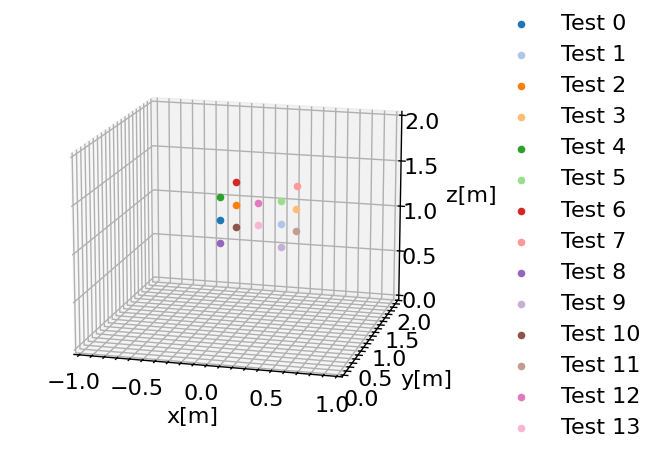

In [63]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i, row in enumerate(df_true[["x", "y", "z"]].to_numpy()):
    print(type(row))
    ax.scatter(
        row[0],
        row[1],
        row[2],
        label=f"Test {i}",
        color=sns.color_palette("tab20", 14)[int(i)],
    )

ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)
ax.set_xlabel("x[m]", labelpad=10)
ax.set_ylabel("y[m]", labelpad=15)
ax.set_zlabel("z[m]", labelpad=20)
ax.view_init(elev=15, azim=-75)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
ax.set_box_aspect(aspect=None, zoom=0.9)

Text(9.444444444444445, 0.5, 'CDF')

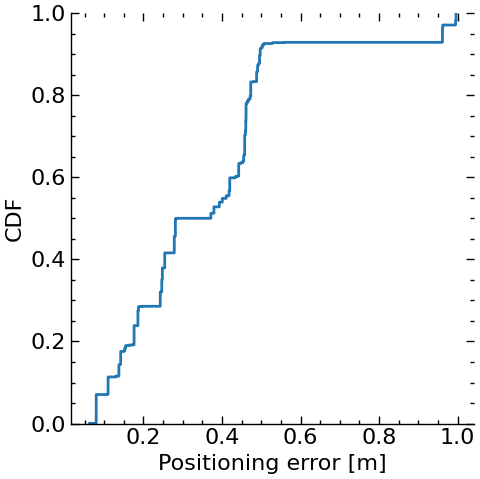

In [17]:
sns.displot(df_est, x="position_error", kind="ecdf")
plt.xlabel("Positioning error [m]")
plt.ylabel("CDF")

Text(21.443965277777778, 0.5, 'CDF')

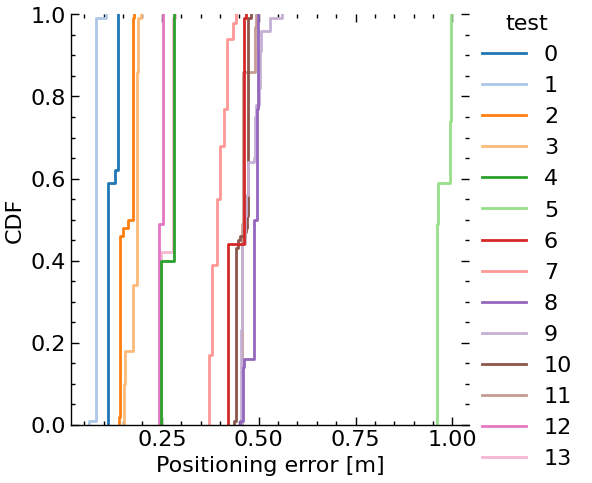

In [18]:
sns.displot(df_est, x="position_error", kind="ecdf", hue="test", palette="tab20")
plt.xlabel("Positioning error [m]")
plt.ylabel("CDF")

Text(9.444444444444445, 0.5, 'CDF')

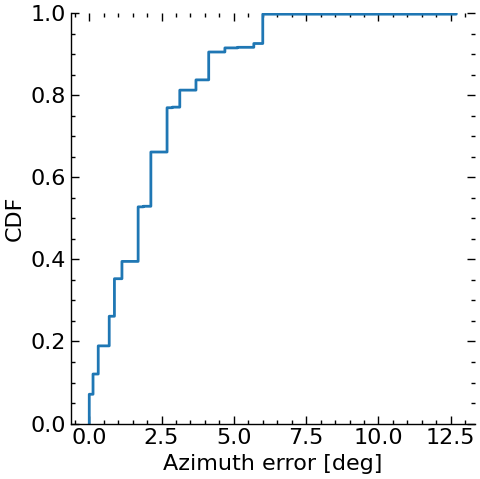

In [19]:
sns.displot(df_est, x="azimuth_error", kind="ecdf")
plt.xlabel("Azimuth error [deg]")
plt.ylabel("CDF")

Text(21.443965277777778, 0.5, 'CDF')

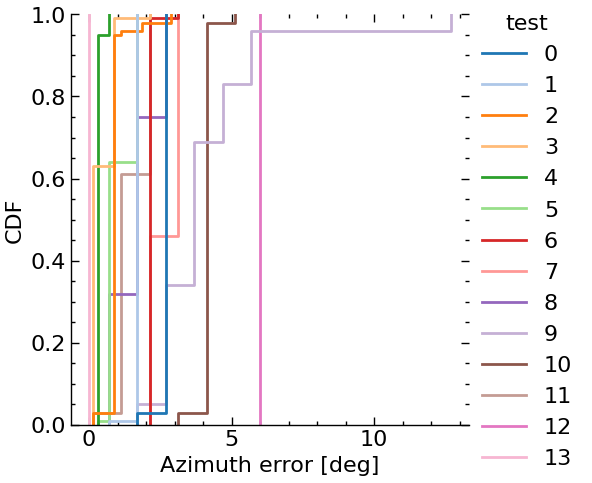

In [46]:
sns.displot(df_est, x="azimuth_error", kind="ecdf", hue="test", palette="tab20")
plt.xlabel("Azimuth error [deg]")
plt.ylabel("CDF")

Text(9.444444444444445, 0.5, 'CDF')

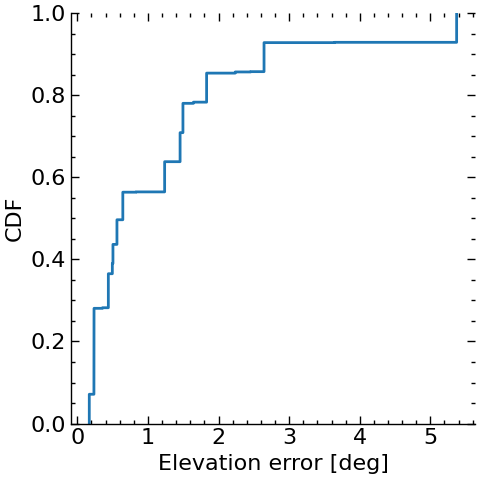

In [21]:
sns.displot(df_est, x="elevation_error", kind="ecdf")
plt.xlabel("Elevation error [deg]")
plt.ylabel("CDF")

Text(21.443965277777778, 0.5, 'CDF')

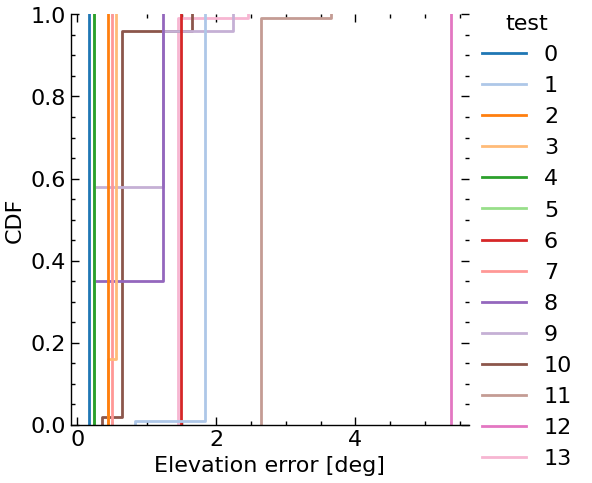

In [47]:
sns.displot(df_est, x="elevation_error", kind="ecdf", hue="test", palette="tab20")
plt.xlabel("Elevation error [deg]")
plt.ylabel("CDF")

Text(9.444444444444445, 0.5, 'CDF')

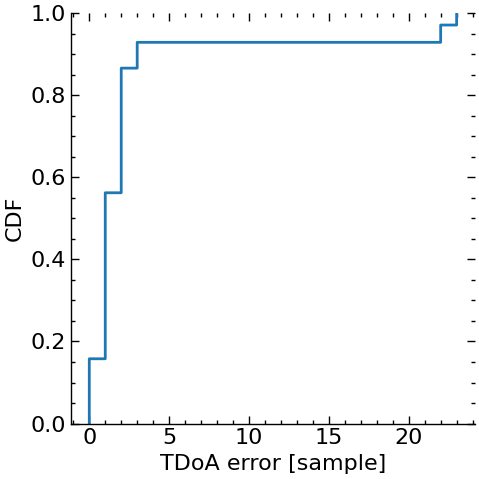

In [23]:
sns.displot(df_est, x="tdoa_error", kind="ecdf")
plt.xlabel("TDoA error [sample]")
plt.ylabel("CDF")

Text(21.443965277777778, 0.5, 'CDF')

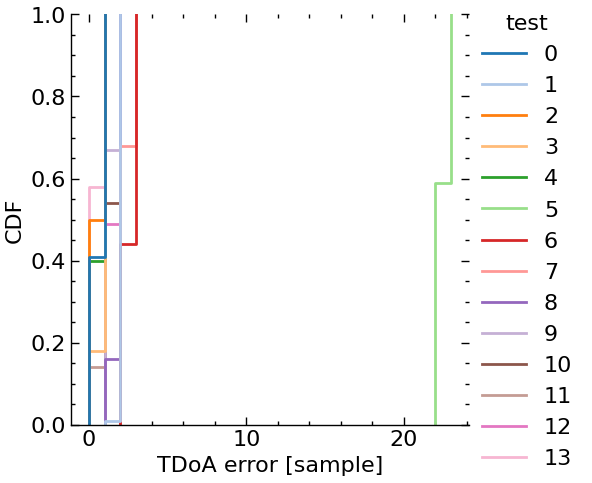

In [48]:
sns.displot(df_est, x="tdoa_error", kind="ecdf", hue="test", palette="tab20")
plt.xlabel("TDoA error [sample]")
plt.ylabel("CDF")

In [25]:
pos_err_90p = np.percentile(df_est["position_error"], 90)
pos_err_50p = np.percentile(df_est["position_error"], 50)
azimuth_err_90p = np.percentile(df_est["azimuth_error"], 90)
azimuth_err_50p = np.percentile(df_est["azimuth_error"], 50)
elevation_err_90p = np.percentile(df_est["elevation_error"], 90)
elevation_err_50p = np.percentile(df_est["elevation_error"], 50)
tdoa_err_90p = np.percentile(df_est["tdoa_error"], 90)
tdoa_err_50p = np.percentile(df_est["tdoa_error"], 50)
print(
    f"pos_err_90p: {pos_err_90p:.3f}, pos_err_50p: {pos_err_50p:.3f},  height_err_90p: {tdoa_err_90p:.3f}, height_err_50p: {tdoa_err_50p:.3f}"
)
print(
    f"azimuth_err_90p: {azimuth_err_90p}, azimuth_err_50p: {azimuth_err_50p}, elevation_err_90p: {elevation_err_90p}, elevation_err_50p: {elevation_err_50p}"
)

pos_err_90p: 0.497, pos_err_50p: 0.328,  height_err_90p: 3.000, height_err_50p: 1.000
azimuth_err_90p: 4.13010235415598, azimuth_err_50p: 1.6900675259797868, elevation_err_90p: 2.6441749571448128, elevation_err_50p: 0.6441749571448128


In [26]:
from positioning.get_spectrum_amplitude import get_sn_amplitude

In [27]:
signal_noise = np.array(
    [
        get_sn_amplitude(
            test_signal[12][i * 120000 : (i + 2) * 120000],
            first_freq=1000,
            last_freq=24000,
            interval_length=0.1,
            signal_length=0.001,
        )
        for i in range(100)
    ]
)

In [28]:
signal_noise_avg = np.mean(signal_noise, axis=0)
snr = []
for sn in signal_noise_avg:
    snr.append(tools.get_snr(sn[0], sn[1]))

In [29]:
snr

[45.97509228220595,
 41.35111242436817,
 44.89777445937701,
 38.272941230426575,
 43.55519852433048,
 46.06712522504969,
 44.14235187266701,
 45.032518605301235,
 40.86760500461143,
 39.49528499498693,
 41.73982918256072,
 42.7190804187306,
 40.886536257285286,
 37.492148021136,
 40.577252203199876,
 47.34520067055743,
 49.1280629327355,
 44.71103472260179,
 38.65952720451236,
 34.3704626521883,
 34.81142870739962,
 23.403234259167544,
 6.458390072365105]

In [30]:
freqs = np.arange(1000, 24000, 1000)

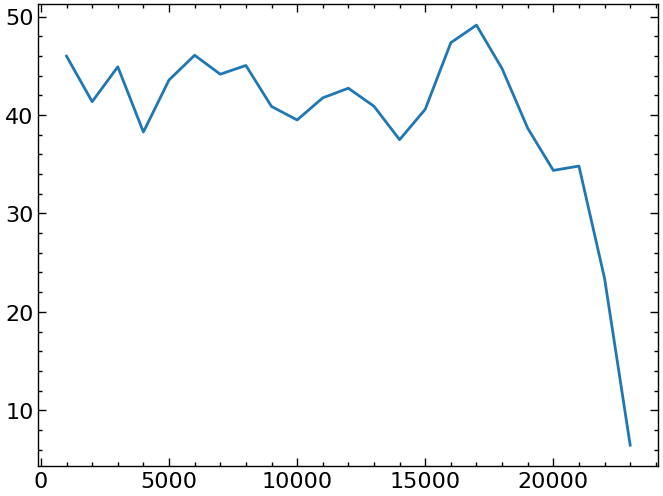

In [31]:
plt.plot(freqs, snr)

In [32]:
signal_noise_13 = np.array(
    [
        get_sn_amplitude(
            test_signal[13][i * 120000 : (i + 2) * 120000],
            first_freq=1000,
            last_freq=24000,
            interval_length=0.1,
            signal_length=0.001,
        )
        for i in range(100)
    ]
)

In [33]:
signal_noise_avg_13 = np.mean(signal_noise_13, axis=0)
snr_13 = [tools.get_snr(sn[0], sn[1]) for sn in signal_noise_avg_13]

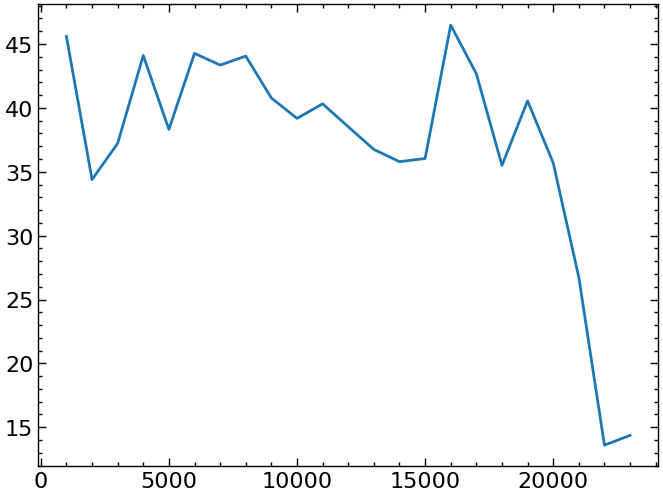

In [34]:
plt.plot(freqs, snr_13)

In [35]:
signal_noise_4 = np.array(
    [
        get_sn_amplitude(
            test_signal[4][i * 120000 : (i + 2) * 120000],
            first_freq=1000,
            last_freq=24000,
            interval_length=0.1,
            signal_length=0.001,
        )
        for i in range(100)
    ]
)

In [36]:
signal_noise_avg_4 = np.mean(signal_noise_4, axis=0)
snr_4 = [tools.get_snr(sn[0], sn[1]) for sn in signal_noise_avg_4]

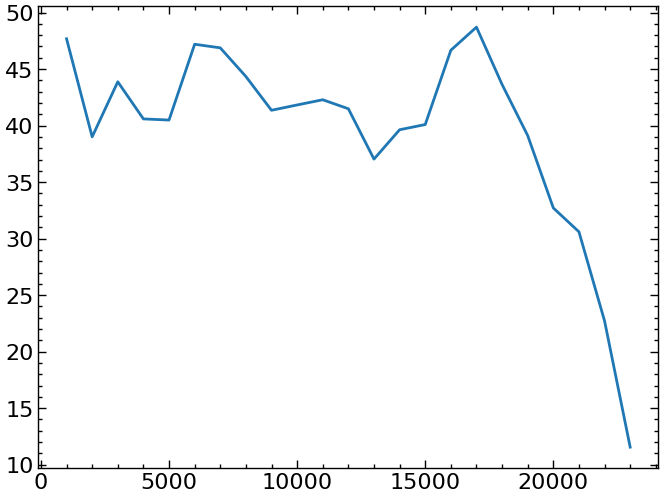

In [37]:
plt.plot(freqs, snr_4)

In [38]:
signal_noise_11 = np.array(
    [
        get_sn_amplitude(
            test_signal[11][i * 120000 : (i + 2) * 120000],
            first_freq=1000,
            last_freq=24000,
            interval_length=0.1,
            signal_length=0.001,
        )
        for i in range(100)
    ]
)

In [39]:
signal_noise_avg_11 = np.mean(signal_noise_11, axis=0)
snr_11 = [tools.get_snr(sn[0], sn[1]) for sn in signal_noise_avg_11]

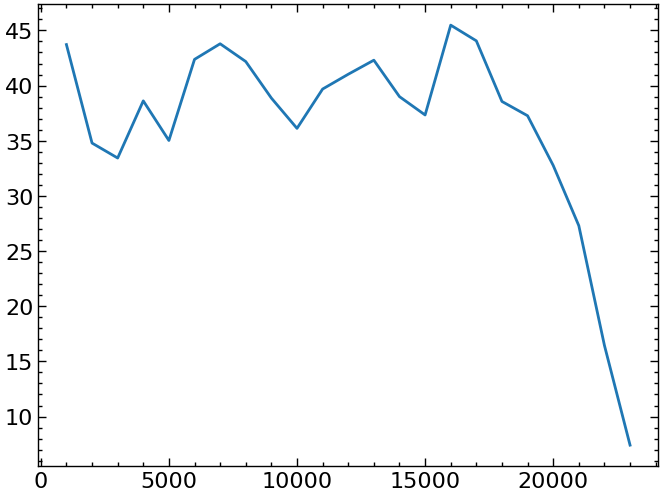

In [40]:
plt.plot(freqs, snr_11)

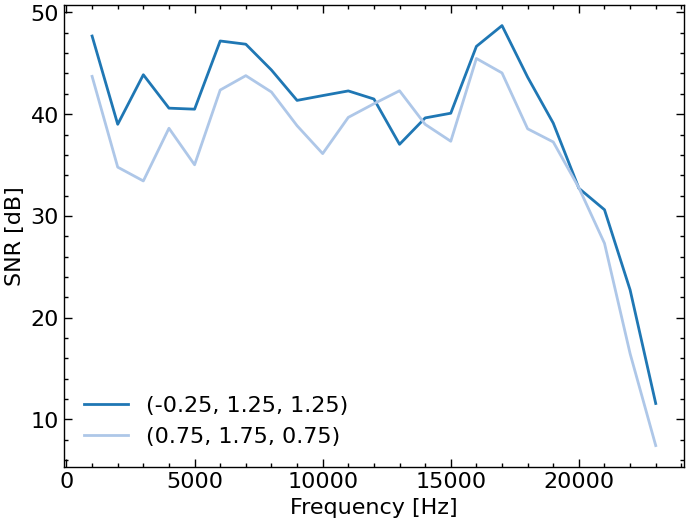

In [41]:
plt.plot(freqs, snr_4, label="(-0.25, 1.25, 1.25)")
plt.plot(freqs, snr_11, label="(0.75, 1.75, 0.75)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("SNR [dB]")
plt.legend()

In [42]:
reference_pos = pd.read_csv("../data/reference-reflect-1ms/reference_3d_position.csv")
reference_pos.head()

,x,y,z,azimuth,elevation,mcs_x,mcs_y,mcs_z
0,-1.383,1.648,1,-40,20,-0.383,2.148,1
1,-0.952,1.648,1,-30,20,0.048,2.148,1
2,-0.600,1.648,1,-20,20,0.400,2.148,1
3,-0.291,1.648,1,-10,20,0.709,2.148,1
4,0.000,1.648,1,0,20,1.000,2.148,1


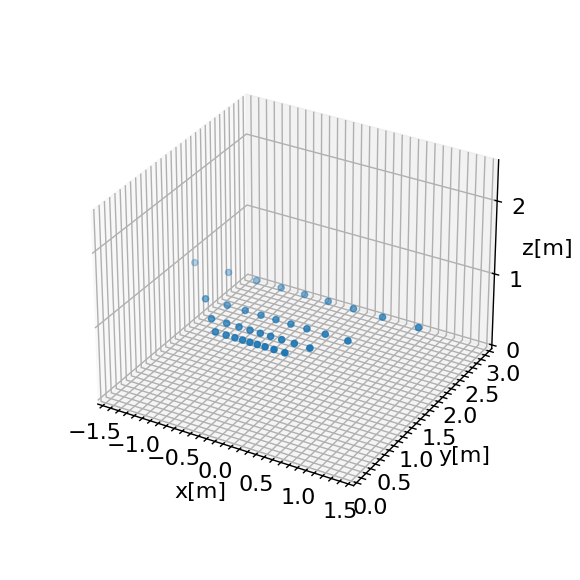

In [86]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(reference_pos["x"], reference_pos["y"], reference_pos["z"])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3)
ax.set_zlim(0, 2.5)
ax.set_zticks([0, 1.0, 2.0])
ax.set_xlabel("x[m]", labelpad=10)
ax.set_ylabel("y[m]", labelpad=15)
ax.set_zlabel("z[m]", labelpad=8)
ax.view_init(elev=30, azim=-60)
fig.subplots_adjust(wspace=1, hspace=0.1)
ax.set_box_aspect(aspect=None, zoom=0.8)
fig.tight_layout()

In [44]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [45]:
sns.color_palette(n_colors=14)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]

In [49]:
from positioning.make_wave import reference_transmit_tukey
import scipy.signal as sg

In [59]:
res_signal = test_signal[0][0 * 120000 : (0 + 2) * 120000]
ref_transmit = reference_transmit_tukey(
    first_freq=1000,
    last_freq=24000,
    interval_length=0.1,
    signal_length=0.001,
)  # 参照信号の生成
corr = np.abs(sg.correlate(res_signal, ref_transmit, mode="valid"))  # 相互相関
corr_lags = sg.correlation_lags(len(res_signal), len(ref_transmit), mode="valid")
index_f = corr_lags[corr.argmax()]  # 最大値のインデックス見つける
next_peak = np.argmax(corr[index_f + 20 : index_f + 100]) + index_f + 20
diff = next_peak - index_f

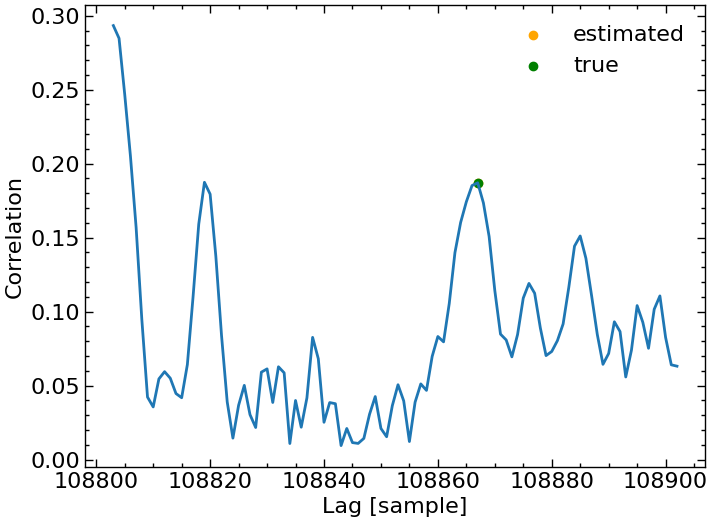

In [60]:
plt.plot(corr_lags[index_f : index_f + 100], corr[index_f : index_f + 100])
plt.scatter(corr_lags[next_peak], corr[next_peak], label="estimated", c="orange")
plt.scatter(corr_lags[index_f + 64], corr[index_f + 64], label="true", c="green")
plt.xlabel("Lag [sample]")
plt.ylabel("Correlation")
plt.legend()